In [23]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading 
* Outlier가 있는 데이터를 로딩합니다. 


In [26]:
df0=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Day2Source-20210618T044204Z-001/Day2Source/Hard_Melbourne4.csv')
#df0=df0.drop('desc',axis=1)


# Outlier Dection

* Outlier Dection 하기전에 데이터 분포를 확인합니다.

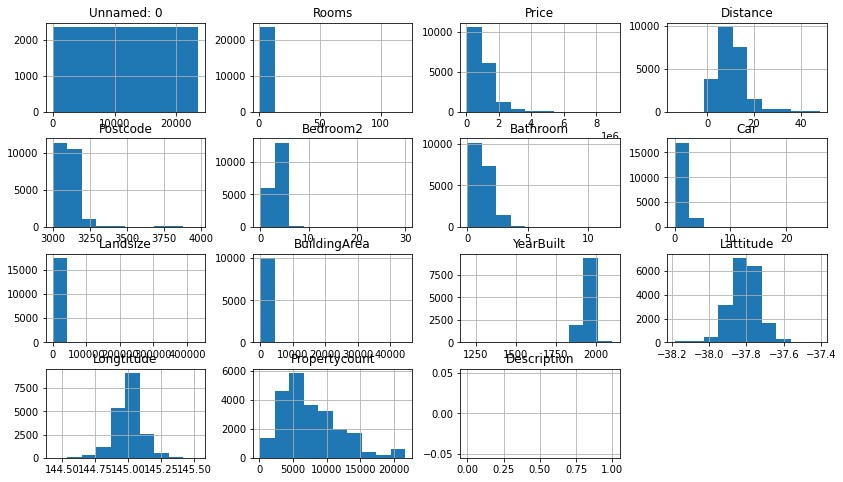

In [27]:
plt.rcParams['figure.figsize'] = [14, 8]
hist = df0.hist(bins=10)




* 기계적인  Outlier Dection을  합니다.

In [28]:
outlier_up = df0.mean() + df0.std() *3 
outlier_down = df0.mean() - df0.std() *3 

In [29]:
outlier_up_found = df0[df0 > outlier_up]
outlier_up_found_count=outlier_up_found.count()
outlier_up_found_count


Unnamed: 0         0
Suburb             0
Address            0
Rooms             45
Type               0
Price            322
Method             0
SellerG            0
Date               0
Distance         444
Postcode         320
Bedroom2         137
Bathroom         242
Car              197
Landsize          31
BuildingArea       7
YearBuilt          1
CouncilArea        0
Lattitude         56
Longtitude        65
Regionname         0
Propertycount    629
Description        0
dtype: int64

### 검색된 값들을 확인 합니다.

In [33]:
col='BuildingArea'
df0[ df0[col] > outlier_up[col] ][col]


2466      6791.0
2704      3112.0
3780      1561.0
4256      3558.0
14387     3647.0
15003     4645.0
22632    44515.0
Name: BuildingArea, dtype: float64

In [34]:
# !
col='YearBuilt'
df0[df0[col] > outlier_up[col] ]

## 처리 조건? Row를 삭제할까요? 데이터를 min/max로 채울까요?

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Description
2453,2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,07-11-2016,11.8,3105.0,4.0,2.0,2.0,729.0,255.0,2106.0,Manningham,-37.7637,145.0881,Eastern Metropolitan,4480.0,NaN


## Row를 삭제 하는 예

In [35]:
df0=df0[ df0[col] < outlier_up[col] ] 

In [36]:
col='Rooms'
df0[df0[col] > outlier_up[col] ][col]


57       120
616        8
1026       7
1090       7
1229       7
1640      10
2375       7
2560       7
5398       8
5409       8
7134       8
11215      7
14342      7
16133      8
16765      7
18309      7
18443     10
22572      8
23478      7
Name: Rooms, dtype: int64

In [37]:
outlier_down_found = df0[df0 < outlier_down]
outlier_down_found.count()

Unnamed: 0         0
Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           1
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt          7
CouncilArea        0
Lattitude        101
Longtitude       124
Regionname         0
Propertycount      0
Description        0
dtype: int64

In [38]:
col='YearBuilt'
df0[df0[col] < outlier_down[col] ][col]


3533     1830.0
4248     1850.0
8030     1850.0
8935     1850.0
9626     1850.0
13655    1800.0
16424    1196.0
Name: YearBuilt, dtype: float64

In [40]:
# !
col='Lattitude'
df0[df0[col] < outlier_down[col] ][col]



14386   -38.11948
14388   -38.16492
14608   -38.10422
14784   -38.06257
14866   -38.07938
14868   -38.07810
14879   -38.05304
14998   -38.15517
14999   -38.11870
15276   -38.11014
15467   -38.05379
15527   -38.09111
15557   -38.07468
15644   -38.16316
15761   -38.16439
15880   -38.05510
15946   -38.09083
16159   -38.08712
16260   -38.14264
16528   -38.08170
16704   -38.06022
16790   -38.08981
16942   -38.16628
16943   -38.16121
16944   -38.15814
17288   -38.08814
17438   -38.06830
17439   -38.06788
17481   -38.10984
17553   -38.16483
17554   -38.15983
17752   -38.11336
17960   -38.11471
17986   -38.08053
18051   -38.16320
18453   -38.07960
18454   -38.09665
18529   -38.13743
18530   -38.16146
18668   -38.07054
18672   -38.08699
18718   -38.12477
18719   -38.10226
18721   -38.11161
18849   -38.05614
18972   -38.11835
19039   -38.16404
19102   -38.07583
19283   -38.06009
19354   -38.07912
19355   -38.09798
19388   -38.07202
19463   -38.13275
19464   -38.16147
19467   -38.11984
19468   -3

## min값으로 채우는  예
* 측정값이 Minus이면 문제가 있겠죠! 


In [43]:
theMin=df0[df0[col] > outlier_down[col] ].Lattitude.min()


In [44]:
pd.options.display.max_rows=1000
df0[col] = df0[col].replace(-10,0)
df0[df0[col]<0 ]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Description
2,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,NaN
4,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,NaN
6,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,04-06-2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,NaN
7,7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,06-08-2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra,-37.79650,144.99650,Northern Metropolitan,4019.0,NaN
8,8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,06-08-2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra,-37.79950,144.99740,Northern Metropolitan,4019.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26-08-2017,6.8,3016.0,2.0,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0,NaN
23541,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26-08-2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,NaN
23542,23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,3.0,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0,NaN
23545,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0,NaN


## 값을 강제로 특정값 입력하기

In [45]:

df0.iloc[48,4] = -1
df0[df0[col] < outlier_down[col] ][col]

14386   -38.11948
14388   -38.16492
14608   -38.10422
14784   -38.06257
14866   -38.07938
14868   -38.07810
14879   -38.05304
14998   -38.15517
14999   -38.11870
15276   -38.11014
15467   -38.05379
15527   -38.09111
15557   -38.07468
15644   -38.16316
15761   -38.16439
15880   -38.05510
15946   -38.09083
16159   -38.08712
16260   -38.14264
16528   -38.08170
16704   -38.06022
16790   -38.08981
16942   -38.16628
16943   -38.16121
16944   -38.15814
17288   -38.08814
17438   -38.06830
17439   -38.06788
17481   -38.10984
17553   -38.16483
17554   -38.15983
17752   -38.11336
17960   -38.11471
17986   -38.08053
18051   -38.16320
18453   -38.07960
18454   -38.09665
18529   -38.13743
18530   -38.16146
18668   -38.07054
18672   -38.08699
18718   -38.12477
18719   -38.10226
18721   -38.11161
18849   -38.05614
18972   -38.11835
19039   -38.16404
19102   -38.07583
19283   -38.06009
19354   -38.07912
19355   -38.09798
19388   -38.07202
19463   -38.13275
19464   -38.16147
19467   -38.11984
19468   -3

## 조건으로 검색해서 특정값 채우기


In [47]:
df0.loc[(df0.Lattitude < 0 ),'Lattitude' ] = theMin 
df0.iloc[48,4]
# df0.NOX.min() 

-1

In [48]:
df0.loc[(df0.Lattitude < 0 ) ]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Description
2,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-38.05068,144.99340,Northern Metropolitan,4019.0,NaN
4,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-38.05068,144.99440,Northern Metropolitan,4019.0,NaN
6,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,04-06-2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-38.05068,144.99410,Northern Metropolitan,4019.0,NaN
7,7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,06-08-2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra,-38.05068,144.99650,Northern Metropolitan,4019.0,NaN
8,8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,06-08-2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra,-38.05068,144.99740,Northern Metropolitan,4019.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,23540,Williamstown,8/2 Thompson St,2,t,622500.0,SP,Greg,26-08-2017,6.8,3016.0,2.0,2.0,1.0,NaN,89.0,2010.0,NaN,-38.05068,144.90484,Western Metropolitan,6380.0,NaN
23541,23541,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26-08-2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-38.05068,144.89299,Western Metropolitan,6380.0,NaN
23542,23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,3.0,1.0,0.0,552.0,119.0,1990.0,NaN,-38.05068,144.61839,Western Metropolitan,5262.0,NaN
23545,23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-38.05068,144.88449,Western Metropolitan,6543.0,NaN


In [51]:
col='Propertycount'
df0[df0[col] < outlier_down[col] ][col]


Series([], Name: Propertycount, dtype: float64)

In [52]:
df=df0

# Visualization 


## Visualization for EDA 

### Correlation Graph
* Feature Selection - Variables of Corrleation >= 0.3

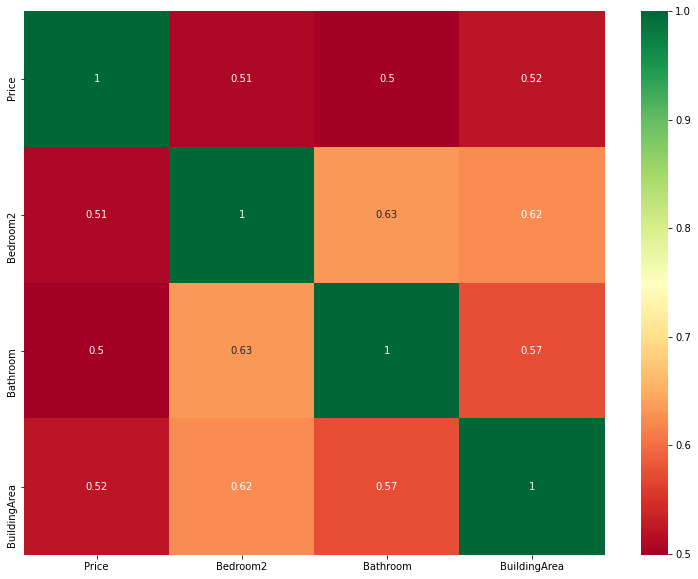

In [54]:


corrmat = df0.corr()
top_corr_features = corrmat.index[abs(corrmat["Price"])>=0.45]
top_corr_features
plt.figure(figsize=(13,10))
g = sns.heatmap(df0[top_corr_features].corr(),annot=True,cmap="RdYlGn")



### Pair Plot

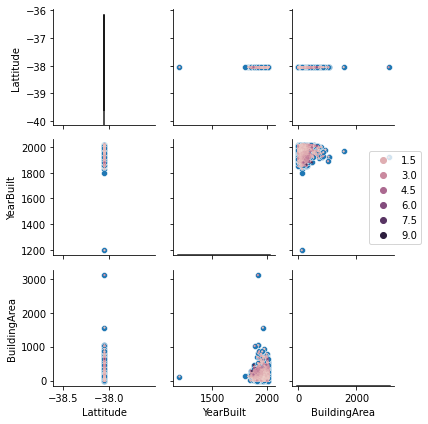

In [55]:

g=sns.pairplot(df0[['Lattitude', 'SellerG', 'YearBuilt',  'BuildingArea']],height=2)
g.map_diag(sns.kdeplot, color=".1")
g.map_offdiag(sns.scatterplot, hue=df0["Price"], s=5, linewidth=0)
g.axes[1, -1].legend(loc="center left", bbox_to_anchor=(.7, .5))

plt.tight_layout()

### Histogram

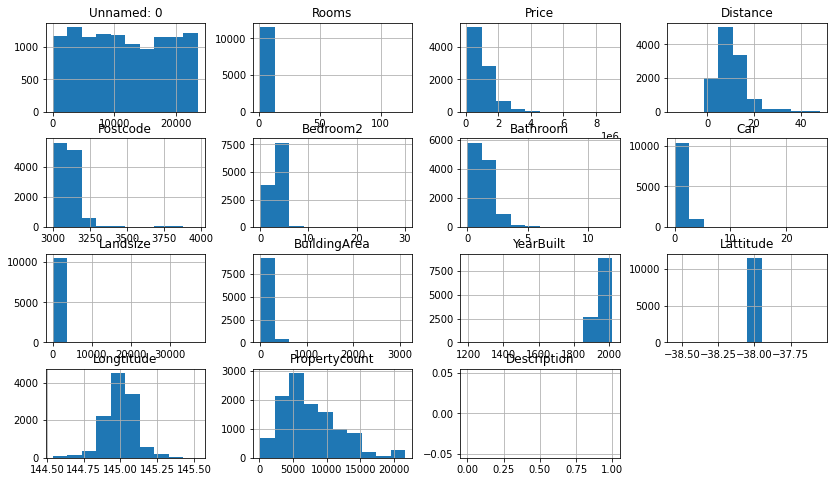

In [56]:
plt.rcParams['figure.figsize'] = [14, 8]

hist = df.hist()


### regplot
* seaborn의  line plot Library

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


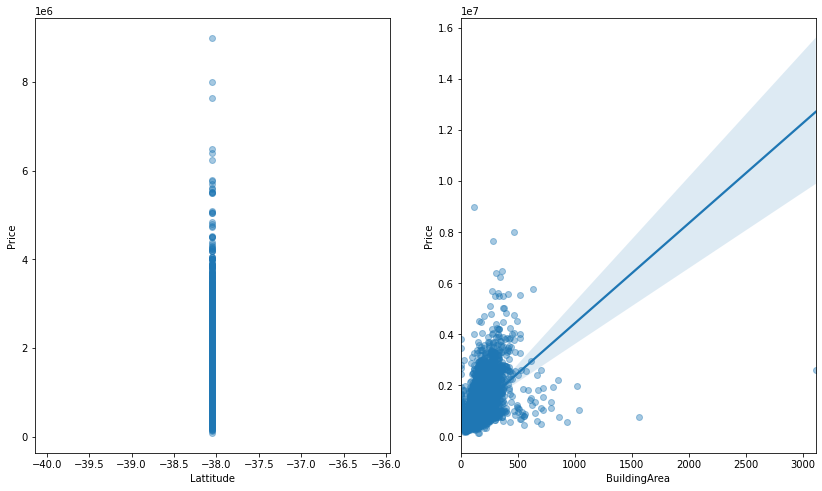

In [57]:
fig, ax = plt.subplots(1, 2) 
sns.regplot('Lattitude', 'Price', df, ax=ax[0],scatter_kws={'alpha': 0.4}) 
sns.regplot('BuildingArea', 'Price', df, ax=ax[1],scatter_kws={'alpha': 0.4})

### Box and Rel Plot

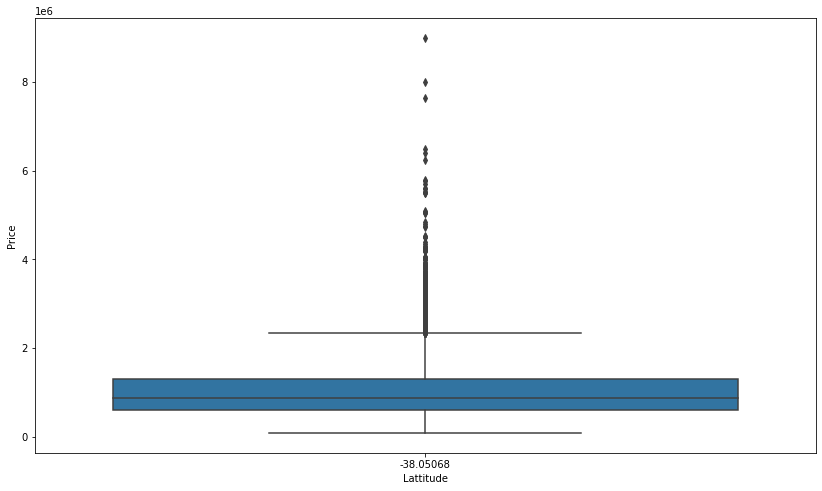

In [58]:
sns.boxplot(y = 'Price', x = 'Lattitude', data =df)

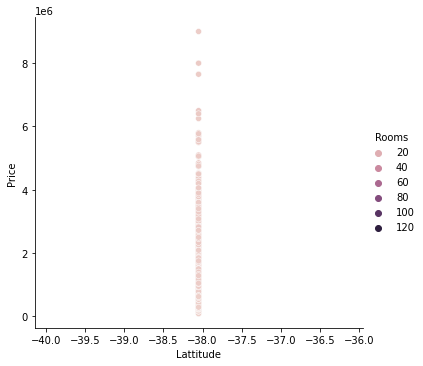

In [59]:


sns.relplot(x = 'Lattitude', y = 'Price', data = df, hue = 'Rooms')



### Joint Plot


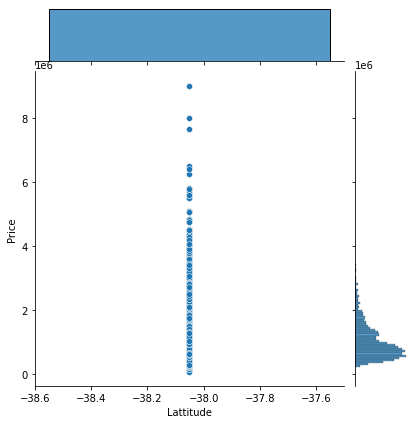

In [60]:
sns.jointplot(x= df['Lattitude'], y = df['Price'])

### Violinplot

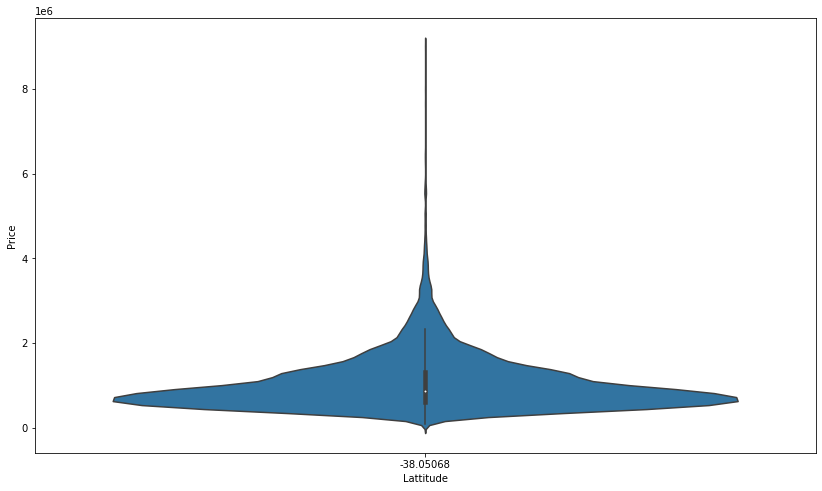

In [61]:
sns.violinplot(x='Lattitude', y='Price', data=df)

### kdeplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


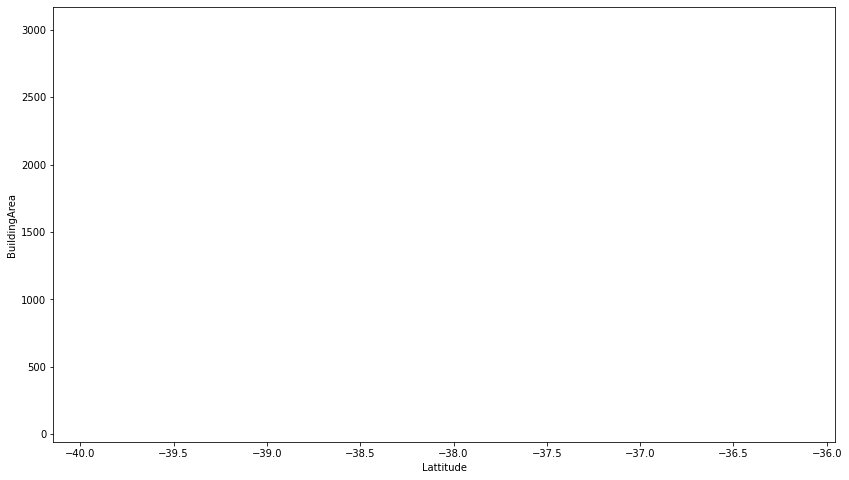

In [63]:
sns.kdeplot(df['Lattitude'], df['BuildingArea'], shade=True)

### Visualization for Model Evaluation

## 1. MSE(Mean Squared Error)

In [64]:
x=np.array([1.,2.,3.,4.])
y =np.array([3.1, 4.9, 7.2, 8.8])
yTarget=2*x+1

np.square( (y-yTarget)**2  ).mean()

0.0008499999999999955

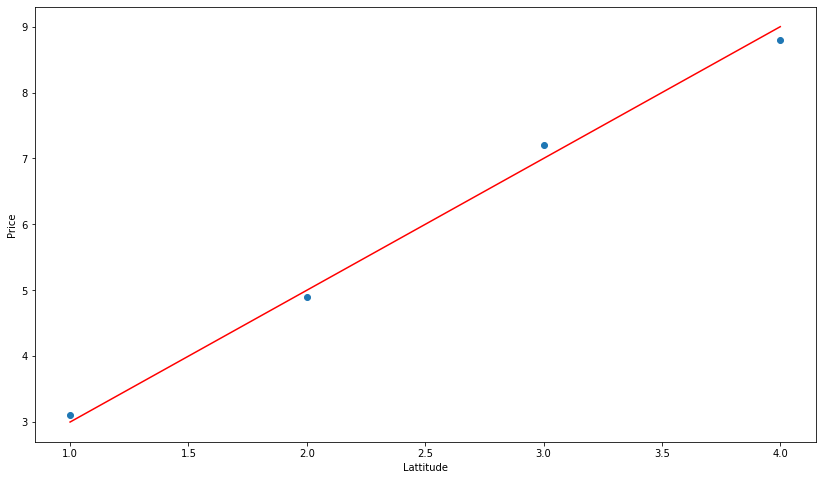

In [65]:
# 실제값(scatter), 예측값(plot) 그래프
plt.scatter(x, y) 
plt.plot(x, yTarget, 'r-')


plt.xlabel('Lattitude')
plt.ylabel('Price')
plt.show()

In [71]:
df_shuffled=df.sample(frac=1).reset_index(drop=True)
len_train_df= int(df.shape[0]*.7)
len_train_df

8077

In [72]:
train_df = df_shuffled[:len_train_df]
test_df = df_shuffled[len_train_df:]


print('train set length: ',len(train_df))
print('test set length: ',len(test_df))



train set length:  8077
test set length:  3462


In [74]:
from sklearn.model_selection import train_test_split

X_train = train_df.drop(['Price'], axis=1)
y_train = train_df['Price']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

X_test = test_df
test_id_idx = test_df.index
print('X_train : ',len(X_train))
print('X_val : ',len(X_val))
print('X_test :',len(X_test))

X_train :  6461
X_val :  1616
X_test : 3462
